# Machine Learning - Decision Tree COVID-19 Predictor

## Khyati Chaturvedi

dataset used : https://www.kaggle.com/datasets/iamhungundji/covid19-symptoms-checker

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set(rc={'figure.figsize':(14,8)}, font_scale=.9)

In [2]:
df = pd.read_csv('C:/Users/KHYATI/Documents/Cleaned-Data.csv')
display(df)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,Other


In [3]:
indicators = ['Fever', 'Tiredness', 'Dry-Cough',  'Difficulty-in-Breathing', 'Sore-Throat', 'Pains', 'Nasal-Congestion',
              'Runny-Nose', 'Diarrhea', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Male',
              'Gender_Female', 'Gender_Transgender']
target_columns = ['Severity_None']
indicators2 = ['Fever', 'Tiredness', 'Dry-Cough',  'Difficulty-in-Breathing', 'Sore-Throat', 'Pains', 'Nasal-Congestion',
              'Runny-Nose', 'Diarrhea', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Male',
              'Gender_Female', 'Gender_Transgender', 'Severity_None']
features = df[indicators]
targets = df[target_columns]
display(features.head(), targets.head())

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Male,Gender_Female,Gender_Transgender
0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0
1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0
2,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0
3,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0
4,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0


,Severity_None
0,0
1,0
2,0
3,0
4,0


C:\Users\KHYATI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


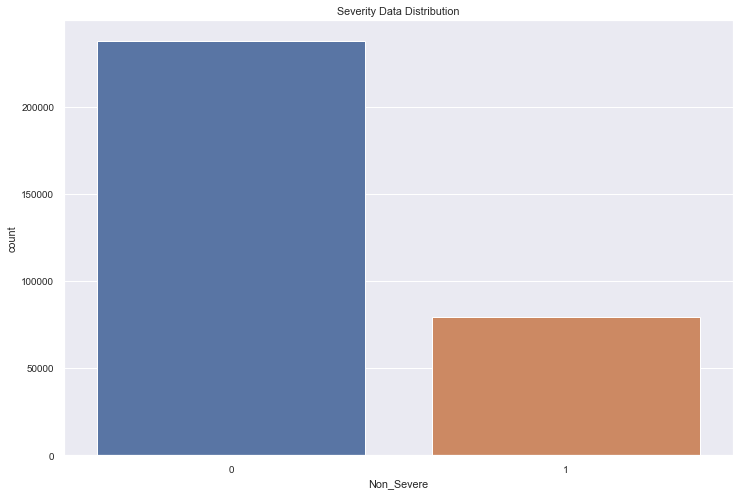

In [4]:
# condition = []
# cond_dict = {
#     0: "Mild",
#     1: "Moderate",
#     2: "Severe"
# }
# for i in targets.values:
#     idx = np.where(i == 1)[0][0]
#     condition.append(cond_dict[idx])
# targets['Condition'] = condition
sns.set(rc={'figure.figsize':(12,8)}, font_scale=.9)
targets = targets.rename(columns={'Severity_None':'Non_Severe'})
sns.countplot(targets['Non_Severe'])
plt.title("Severity Data Distribution")
plt.show()
sns.set(rc={'figure.figsize':(12,8)}, font_scale=.9)

<AxesSubplot:xlabel='Occurence_Count', ylabel='Indicator'>

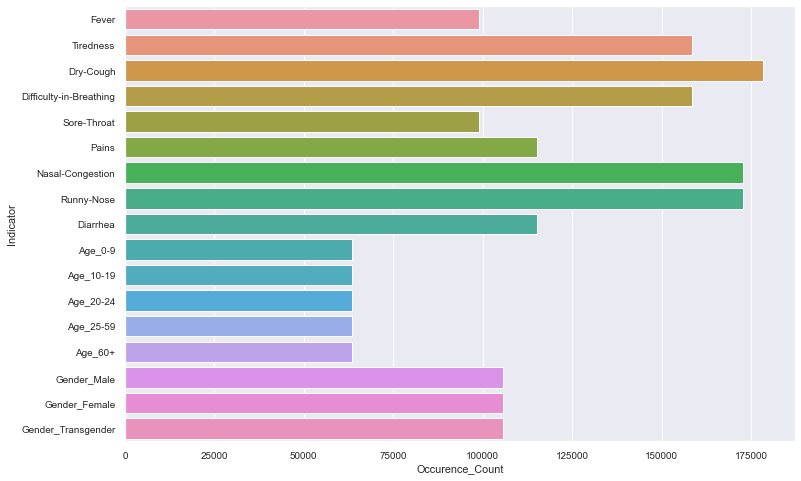

In [5]:
temp = []
for i in indicators:
    temp.append(sum(features[i].values))
temp_df = pd.DataFrame({"Indicator":indicators, "Occurence_Count":temp})
sns.barplot(data = temp_df, y="Indicator", x="Occurence_Count")

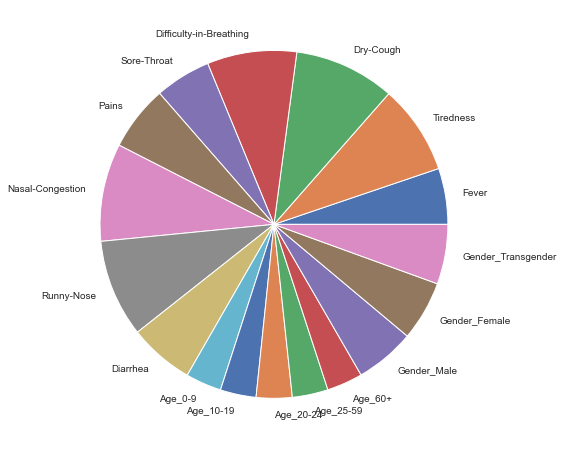

In [6]:
plt.pie(data=temp_df, x="Occurence_Count", labels=temp_df["Indicator"])
plt.show()

In [7]:
def get_symptom_count(the_list):
    return sum(the_list.values)
features['Total_Symptom'] = features[indicators].apply(get_symptom_count, axis=1)
feats = df[indicators2]
feats['Total_Symptom'] = feats[indicators].apply(get_symptom_count, axis=1)

<ipython-input-7-563afcfdda51>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Total_Symptom'] = features[indicators].apply(get_symptom_count, axis=1)
<ipython-input-7-563afcfdda51>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feats['Total_Symptom'] = feats[indicators].apply(get_symptom_count, axis=1)


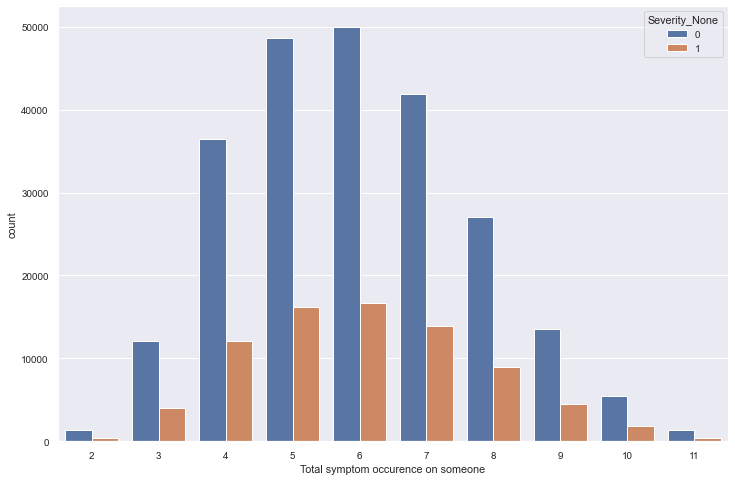

In [8]:
sns.countplot(data=feats, x='Total_Symptom', hue='Severity_None')
plt.xlabel("Total symptom occurence on someone")
plt.show()

In [9]:
data = features
data['Non_Severe'] = targets['Non_Severe'].values
data

<ipython-input-9-a9acb537881f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Non_Severe'] = targets['Non_Severe'].values


,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Male,Gender_Female,Gender_Transgender,Total_Symptom,Non_Severe
0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,11,0
1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,11,0
2,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,11,0
3,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,11,0
4,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,0
316796,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,0
316797,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,1
316798,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,1


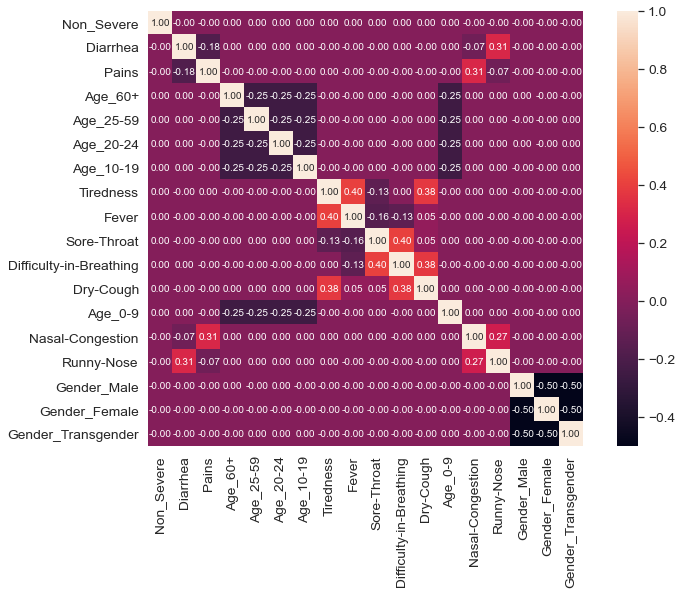

In [10]:
data_for_corr = data.drop(labels="Total_Symptom", axis=1)
# data_for_corr['Condition'] = data_for_corr['Condition'].apply(make_condition_grade)
corrmat = data_for_corr.corr()
k = 22
cols = corrmat.nlargest(k, 'Non_Severe')['Non_Severe'].index
cm = np.corrcoef(data_for_corr[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [11]:
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [12]:
x = data.drop(['Non_Severe', 'Total_Symptom'], axis=1)
x = PCA(n_components = 3).fit_transform(x)
y = data['Non_Severe']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.3)

In [13]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
DTC.score(x_test, y_test)

0.7509574915824916

In [14]:
params = {
    "criterion":["gini", "entropy"],
    "max_depth":[15,20,25], 
}
dtc = DecisionTreeClassifier()
dtc_reg = GridSearchCV(dtc, params, cv=10, n_jobs=10)
dtc_reg.fit(x_train, y_train)
print(dtc_reg.best_estimator_)

DecisionTreeClassifier(max_depth=15)


In [15]:
dtc_tune = DecisionTreeClassifier(max_depth=15)
dtc_tune.fit(x_train, y_train)
score = cross_val_score(dtc_tune, x_test, y_test, cv=k_fold, n_jobs=1, scoring="accuracy")
print(score.mean())

0.7508838383838384


In [16]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [18]:
y_pred_gini = clf_gini.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7510


In [21]:
y_pred_train_gini = clf_gini.predict(x_train)

y_pred_train_gini

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7496


In [24]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set score: 0.7496
Test set score: 0.7510


[Text(0.5, 0.875, 'X[2] <= 0.928\ngini = 0.375\nsamples = 221760\nvalue = [166229, 55531]'),
 Text(0.25, 0.625, 'X[2] <= -0.912\ngini = 0.375\nsamples = 213398\nvalue = [160017, 53381]'),
 Text(0.125, 0.375, 'X[2] <= -0.912\ngini = 0.407\nsamples = 334\nvalue = [239, 95]'),
 Text(0.0625, 0.125, 'gini = 0.418\nsamples = 165\nvalue = [116, 49]'),
 Text(0.1875, 0.125, 'gini = 0.396\nsamples = 169\nvalue = [123, 46]'),
 Text(0.375, 0.375, 'X[1] <= 1.009\ngini = 0.375\nsamples = 213064\nvalue = [159778, 53286]'),
 Text(0.3125, 0.125, 'gini = 0.375\nsamples = 210951\nvalue = [158170, 52781]'),
 Text(0.4375, 0.125, 'gini = 0.364\nsamples = 2113\nvalue = [1608, 505]'),
 Text(0.75, 0.625, 'X[2] <= 0.93\ngini = 0.382\nsamples = 8362\nvalue = [6212, 2150]'),
 Text(0.625, 0.375, 'X[1] <= -1.002\ngini = 0.387\nsamples = 4495\nvalue = [3316, 1179]'),
 Text(0.5625, 0.125, 'gini = 0.354\nsamples = 174\nvalue = [134, 40]'),
 Text(0.6875, 0.125, 'gini = 0.388\nsamples = 4321\nvalue = [3182, 1139]'),
 Te

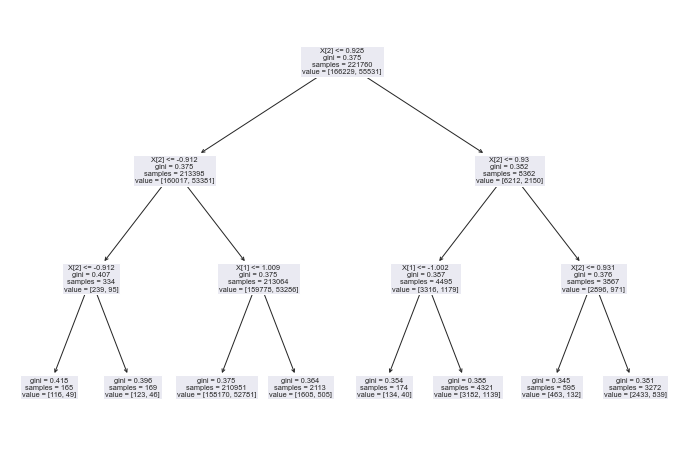

In [25]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(x_train, y_train)) 

In [33]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [34]:
y_pred_en = clf_en.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7510


In [36]:
y_pred_train_en = clf_en.predict(x_train)

y_pred_train_en

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7496


In [39]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(x_test, y_test)))

Training set score: 0.7496
Test set score: 0.7510


[Text(0.5, 0.875, 'X[2] <= 0.928\nentropy = 0.812\nsamples = 221760\nvalue = [166229, 55531]'),
 Text(0.25, 0.625, 'X[2] <= -0.912\nentropy = 0.812\nsamples = 213398\nvalue = [160017, 53381]'),
 Text(0.125, 0.375, 'X[2] <= -0.912\nentropy = 0.861\nsamples = 334\nvalue = [239, 95]'),
 Text(0.0625, 0.125, 'entropy = 0.878\nsamples = 165\nvalue = [116, 49]'),
 Text(0.1875, 0.125, 'entropy = 0.845\nsamples = 169\nvalue = [123, 46]'),
 Text(0.375, 0.375, 'X[1] <= 1.009\nentropy = 0.811\nsamples = 213064\nvalue = [159778, 53286]'),
 Text(0.3125, 0.125, 'entropy = 0.812\nsamples = 210951\nvalue = [158170, 52781]'),
 Text(0.4375, 0.125, 'entropy = 0.793\nsamples = 2113\nvalue = [1608, 505]'),
 Text(0.75, 0.625, 'X[2] <= 0.93\nentropy = 0.822\nsamples = 8362\nvalue = [6212, 2150]'),
 Text(0.625, 0.375, 'X[1] <= -1.002\nentropy = 0.83\nsamples = 4495\nvalue = [3316, 1179]'),
 Text(0.5625, 0.125, 'entropy = 0.778\nsamples = 174\nvalue = [134, 40]'),
 Text(0.6875, 0.125, 'entropy = 0.832\nsamples 

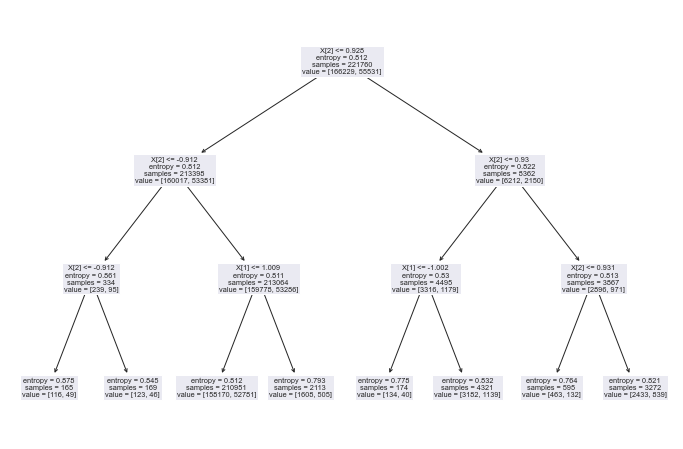

In [40]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(x_train, y_train)) 

In [41]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[71371     0]
 [23669     0]]


In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

C:\Users\KHYATI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KHYATI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.75      1.00      0.86     71371
           1       0.00      0.00      0.00     23669

    accuracy                           0.75     95040
   macro avg       0.38      0.50      0.43     95040
weighted avg       0.56      0.75      0.64     95040



C:\Users\KHYATI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred_en)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[71371     0]
 [23669     0]]
Accuracy :  0.7509574915824916
Sensitivity :  1.0
Specificity :  0.0
